In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline
sns.set()

# Preliminary Probability

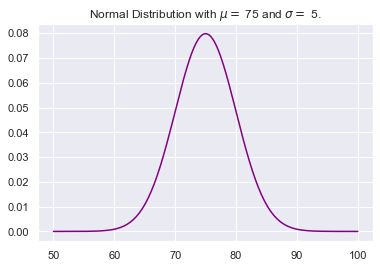

In [9]:
def normalpdf(x,mean,std):
    return (1/(std*(2*np.pi)**(0.5)))*(np.exp(-(x-mean)**2/(2*std**2)))

mean = 75
std = 5
x = np.linspace(50,100,200)
y = np.array([normalpdf(i,mean,std) for i in x])
plt.plot(x,y,color='purple')
plt.xticks()
plt.title(f'Normal Distribution with $\mu =$ {mean} and $\sigma =$ {std}.')
plt.show()

We can also generate the normal pdf by using the scipy library.

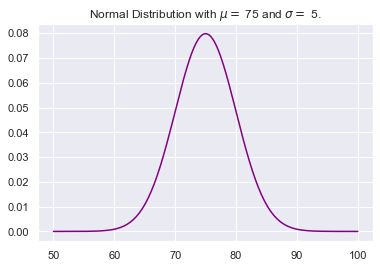

In [12]:
from scipy.stats import norm

mean = 75
std = 5
x = np.linspace(50,100,200)
plt.plot(x,norm.pdf(x,loc=mean,scale=std),color='purple')
plt.xticks()
plt.title(f'Normal Distribution with $\mu =$ {mean} and $\sigma =$ {std}.')
plt.show()

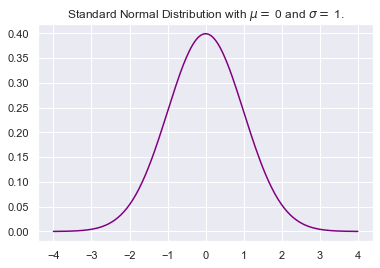

0.6826894921370859

In [21]:
from scipy.stats import norm

mean = 0
std = 1
x = np.linspace(mean-4*std,mean+4*std,200)
plt.plot(x,norm.pdf(x,loc=mean,scale=std),color='purple')
plt.xticks()
plt.title(f'Standard Normal Distribution with $\mu =$ {mean} and $\sigma =$ {std}.')
plt.show()

In [28]:
mean = 0 
std = 1

for i in range(1,5):
    print('Probability {:1.3f} of lying within {:d} standard deviations from the mean. \n'.format(
        norm.cdf(mean+i*std,loc=mean,scale=std)-norm.cdf(mean-i*std,loc=mean,scale=std),i))

Probability 0.683 of lying within 1 standard deviations from the mean. 

Probability 0.954 of lying within 2 standard deviations from the mean. 

Probability 0.997 of lying within 3 standard deviations from the mean. 

Probability 1.000 of lying within 4 standard deviations from the mean. 



In [29]:
mean = 75
std = 5

for i in range(1,5):
    print('Probability {:1.3f} of lying within {:d} standard deviations from the mean. \n'.format(
        norm.cdf(mean+i*std,loc=mean,scale=std)-norm.cdf(mean-i*std,loc=mean,scale=std),i))

Probability 0.683 of lying within 1 standard deviations from the mean. 

Probability 0.954 of lying within 2 standard deviations from the mean. 

Probability 0.997 of lying within 3 standard deviations from the mean. 

Probability 1.000 of lying within 4 standard deviations from the mean. 



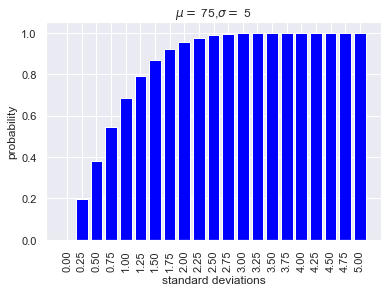

In [54]:
#diminishing returns
mean = 75
std = 5

stand = np.arange(0,5.25,0.25)
prob = np.array([norm.cdf(mean+i*std,loc=mean,scale=std)-norm.cdf(mean-i*std,loc=mean,scale=std) for i in stand])
plt.bar(stand,prob,color='blue',width=0.2)
plt.xticks(stand,rotation='vertical')
plt.xlabel('standard deviations')
plt.ylabel('probability')
plt.title(f'$\mu =$ {mean},$\sigma =$ {std}')
plt.show()

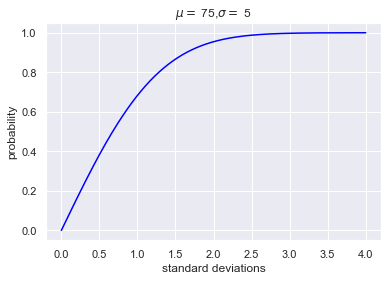

In [61]:
#diminishing returns
mean = 75
std = 5

stand = np.linspace(0,4,200)
prob = np.array([norm.cdf(mean+i*std,loc=mean,scale=std)-norm.cdf(mean-i*std,loc=mean,scale=std) for i in stand])
plt.plot(stand,prob,color='blue')
plt.xlabel('standard deviations')
plt.ylabel('probability')
plt.title(f'$\mu =$ {mean},$\sigma =$ {std}')
plt.show()

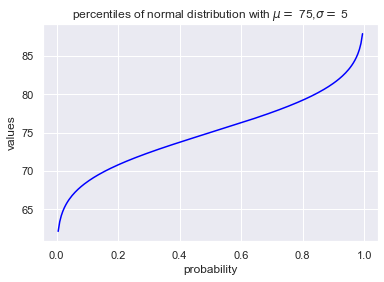

In [64]:
#diminishing returns
mean = 75
std = 5

prob = np.linspace(0,1,200)
percentiles = np.array([norm.ppf(i,loc=mean,scale=std) for i in prob])
plt.plot(prob,percentiles,color='blue')
plt.xlabel('probability')
plt.ylabel('values')
plt.title(f'percentiles of normal distribution with $\mu =$ {mean},$\sigma =$ {std}')
plt.show()

In [69]:
random.gauss(50,5)

50.37508351496921

# Duelist & Arena Classes

In [316]:
class Duelist():
    '''a duelist'''
    all_duelists = {}
    dead_duelists = {}
    def __init__(self,name,health,damage,std,armor,arpen,misschance):
        self.name = str(name) #primary key
        self.health = float(health)
        self.armor = float(armor)
        self.damage = float(damage)
        self.std = float(std)
        self.dmgrange = 30
        self.misschance = float(misschance)
        self.arpen = float(arpen)
        self.regeneration = 0
        self.items = {}
        self.stats = {'Name':self.name,
                     'Health':self.health,
                     'Armor':self.armor,
                     'Mean Damage':self.damage,
                      'Standard Deviation':self.std,
                     'Arpen':self.arpen,
                     'Miss chance':self.misschance,
                     'Life Regeneration':self.regeneration,
                     'Items':self.items}
        self.initialpool = health
        Duelist.all_duelists[self.name] = self
        
    def ressurect(self):
        self.health = self.initialpool
        #print(f'{self.name} started breathing again...')
    
    def isalive(self):
        return True if self.health>0 else False
        
    def attack(self,uniform=True):
        if uniform: return random.random()*30+self.damage if self.isalive() else f'{self.name} is dead.'
        return random.gauss(self.damage,self.std) if self.isalive() else f'{self.name} is dead.'
    
    def armored(self,damage):
        return damage*(1-Duelist.armor(self.armor))
    
    @staticmethod
    def flip(p):
        return 1 if random.random()<=p else 0
    
    def attackedby(self,other,uniform=True,can_miss=False):
        if self.isalive():
            if can_miss:
                if Duelist.flip(other.misschance)==1:
                    dmg = other.attack(uniform)
                    self.health -= self.armored(dmg)
                    if self.health<=0: Duelist.dead_duelists[self.name] = self
                    return dmg
                else: 
                    print(f'{other.name} missed!')
                    return 0
            else:
                dmg = other.attack(uniform)
                self.health -= self.armored(dmg)
                if self.health<=0: Duelist.dead_duelists[self.name] = self
                return dmg
        return f'{self.name} is dead.'
            
    def acquireitem(self,item):
        pass

    def castspell(self):
        pass
    
    @staticmethod
    def armor(a,p=1,k=100):
        return (a**p)/(a**p+k)
    
    @staticmethod
    def armorpen(par):
        pass
    
    @staticmethod
    def show():
        for key in sorted(Duelist.all_duelists):
            print(Duelist.all_duelists[key])
            
    def __repr__(self):
        s = 'Duelist \n'
        for key,value in self.stats.items():
            s += f'{key}: \t {value}\n'
        return s

In [293]:
class Arena(Duelist):
    '''Duel mode'''
    win_records = {}
    tods = []
    def __init__(self,duelist1,duelist2):
        self.duelist1 = duelist1
        self.duelist2 = duelist2
        self.duelists = {0:self.duelist1,1:self.duelist2}
        self.n_rounds = 0
        self.damage = []
        self.health1 = [self.duelist1.health]
        self.health2 = [self.duelist2.health]
    
    @staticmethod
    def cleantods():
        Arena.tods = []
        
    def sequential_duel(self,uniform=True,can_miss=False):
            key = 0
            while self.duelist1.isalive() & self.duelist2.isalive():
                self.n_rounds += 1
                self.damage.append(self.duelists[(key+1)%2].attackedby(self.duelists[key%2],uniform,can_miss))
                self.health1.append(self.duelists[0].health)
                self.health2.append(self.duelists[1].health)
                key+=1
            return key
        
    def many_duels(self,N=1,uniform=True,can_miss=False)
            M = N
            rounds = []
            while N>0:
                self.sequential_duel(uniform,can_miss)
                
                
    
    def simultaneous_duel(self):
        pass
    
    def dummy(self,uniform=True):
        key = 0
        while self.duelist1.isalive():
            self.n_rounds +=1
            self.damage.append(self.duelist1.attackedby(self.duelist2,uniform,can_miss))
            self.health1.append(self.duelist1.health)
            key +=1
        Arena.tods.append(key)
        return key
                
    def winner(self):
        return self.duelist2 if self.sequential_duel()%2==0 else self.duelist1
        
    def timeofdeath(self):
        return self.n_rounds
    
    def showstats(self,dummy=False):
        rounds = np.arange(0,self.n_rounds+1,1)
        #plt.plot(rounds[::2],self.damage[::2],color='blue')
        #plt.plot(rounds[::1],self.damage[::1],color='red')
        plt.plot(rounds,self.health1,color='blue',label=f'{self.duelist1.name}')
        if not dummy:
            plt.plot(rounds,self.health2,color='red',label=f'{self.duelist2.name}')
        plt.legend()
        #plt.xticks(rounds,rotation='vertical')
        plt.xlabel('rounds')
        plt.ylabel('induced damage')
        plt.title('Health vs rounds')
        plt.grid()
        plt.tight_layout()
        plt.show()

In [312]:
duelist1 = Duelist('Nicole',1,1,0,0,0,0.5)
duelist2 = Duelist('Poppy',1,1,0,0,0,0.5)

In [313]:
arena = Arena(duelist1,duelist2)

In [314]:
arena.sequential_duel(uniform=True,can_miss=True)

Nicole missed!
Poppy missed!
Nicole missed!


4

In [315]:
arena.n_rounds

4

In [115]:
duelist1.isalive()

True

In [116]:
duelist1.attacked(duelist1)

array([34])

In [117]:
duelist1.health

array([469.64285714])

In [131]:
duelist1.attacked(duelist2)
duelist1.health

array([-46.42857143])

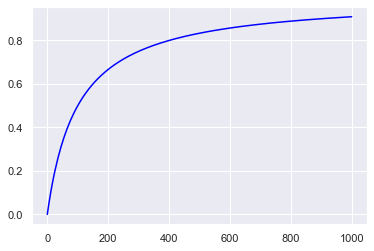

In [3]:
damage = 50
a = np.linspace(0,1000,200)
plt.plot(a,Duelist.armor(a),color='blue')
plt.show()

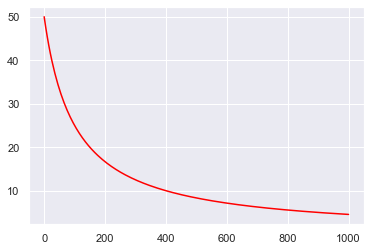

In [4]:
damage = 50
a = np.linspace(0,1000,200)
plt.plot(a,damage*(1-Duelist.armor(a)),color='red')
plt.show()

In [173]:
duelist1 = Duelist('Nicole',500,12,30,0)
duelist2 = Duelist('Poppy',600,15,40,0)

In [142]:
x = print(duelist1.health,duelist2.health)
x

500.0 600.0


In [143]:
y = duelist1.attacked(duelist2)
x

In [145]:
print(duelist1.health,duelist2.health)

[461.60714286] 600.0


In [174]:
duelist2.attacked(duelist1)
print(duelist1.health,duelist2.health)

AttributeError: 'Duelist' object has no attribute 'attacked'

In [175]:
arena = Arena(duelist1,duelist2)

In [176]:
arena.sequential_duel()

20

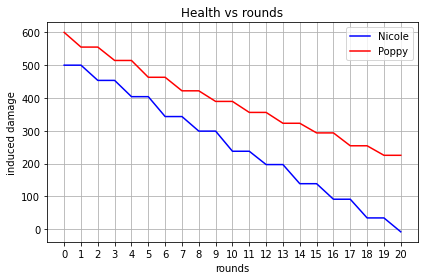

In [177]:
arena.showstats()

In [169]:
arena.winner()

Duelist 
Name: 	 Poppy
Health: 	 600.0
Armor: 	 15.0
Damage: 	 40.0
Arpen: 	 0.0

In [170]:
arena.health1

[500.0,
 500.0,
 456.04892470206306,
 456.04892470206306,
 396.60415918034755,
 396.60415918034755,
 344.2781856418044,
 344.2781856418044,
 290.26866219972277,
 290.26866219972277,
 243.1332140430082,
 243.1332140430082,
 192.67046073076946,
 192.67046073076946,
 130.85355625210588,
 130.85355625210588,
 79.6273661203301,
 79.6273661203301,
 39.93607348686327,
 39.93607348686327,
 -14.300235115112606]

In [171]:
arena.health2

[600.0,
 548.6732853613456,
 548.6732853613456,
 506.2909143440182,
 506.2909143440182,
 458.2765657388335,
 458.2765657388335,
 421.3038286101734,
 421.3038286101734,
 393.6401235274642,
 393.6401235274642,
 353.86563071284985,
 353.86563071284985,
 324.567086289628,
 324.567086289628,
 280.7069591722798,
 280.7069591722798,
 229.0965037585146,
 229.0965037585146,
 193.11264767413059,
 193.11264767413059]

In [141]:
duelist1 = Duelist('Nicole',500,0,2,20,2)
duelist2 = Duelist('Aristotle',100,10,70,50,0)

In [142]:
arena = Arena(duelist1,duelist2)

In [143]:
arena.dummy(uniform=False)

9

In [144]:
arena.show()

Duelist 
Name: 	 Aristotle
Health: 	 100.0
Armor: 	 10.0
Damage: 	 70.0
Arpen: 	 0.0

Duelist 
Name: 	 Nicole
Health: 	 500.0
Armor: 	 0.0
Damage: 	 2.0
Arpen: 	 2.0



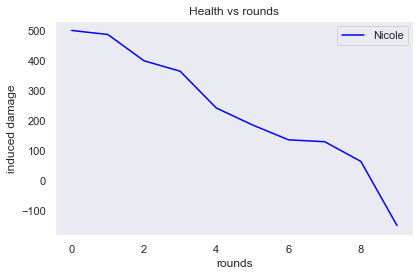

In [145]:
arena.showstats(dummy=True)

Theory on the chance of death before round n.
<br> Consider $n$ independent, indentically distributed (abbreviated as i.i.d.) normally distributed $X_{1} , \dots , X_{n}$ random variables, i.e. $X_{ 1 } , \dots , X_{ n } \sim \mathcal{N} ( \mu , \sigma^{2} )$, where $\mu$ and $\sigma$ are user defined. Particularly, in duelist class defined above, we are using $\mu =$ self.damage and $\sigma =$ self.std, whenever the gaussian damage mode is activated in the attack() and attackedby() class methods by setting uniform = False. This defines a closed interval whereas the damage will lie within with overwhelming probability (usually 4 standard deviations from the mean will contain any *extreme phenomena*). 
<br> Notably, the sum of i.i.d gaussian r.v.s is also a gaussian with mean $n \mu$ and $n \sigma^{2}$, i.e.
           $$S_{ n } = \sum_{ i } X_{ i } \sim \mathcal{ N } ( n \mu , n \sigma^{2} ).$$
<br> We want to estimate the probabilities $p_{ n } = \mathbb{ P } ( S_{ n } <= \textit{Health} )$, of the accumulating damage of duelist 1, not to have surpassed the overall health pool of duelist 1 - in the dummy mode class method. Since $S_{ n }$ is gaussian this can be easily accomplished via the quantile function in scipy.stats module, as illustrated below.

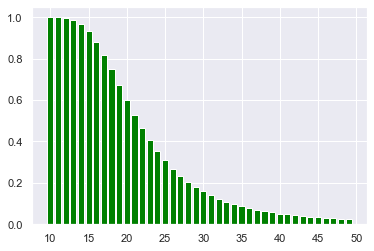

In [148]:
mean = 70
std = 20

health = 1500
n = np.arange(10,50,1)
#damage = np.array([sum(np.random.normal(loc = 70 , scale = 20 , n)) for i in n])
y = np.array([norm.cdf(health,loc = i*mean, scale = i*std) for i in n])
plt.bar(n,y,color='green')
plt.show()

**Time of death** is defined as:
       $$t_{d} = \min \{ n : H(n)<=0 \}.$$
In discrete deterministic case, time of death (ToD) is given by:
$$H(n) = H(0) - d \frac{n(n+1)}{2}$$
or equivalently
$$n^2 + n - 2 \frac{H(0)}{d} = 0$$
Thus,
$$n = \frac{ -1 + \sqrt{ 1 + 8 H(0)d^{-1}}}{2}$$
Since $H(n)$ is decreasing, we obtain:
       $$t_{d} = \floor{n}.$$
In the stochastic case, ToD is a random variable,
       \begin{equation*}
       \begin{split}
       t_{d} & = \min \left\{ n : H(n) \leq 0 \right\} \\
             & = \min \left\{ n : H(0) \leq d_{1} + \cdots + d_{n} \right\}. \\
       \end{split}
       \end{equation*}
Define $S_{ n } = d_{1} + \cdots + d_{ n }$ and note that
       \begin{equation*}
       \begin{split}
       P ( t_{d} = n ) & = P ( S_{n} \geq H , S_{n-1} < H ) \\
                       & = P ( d_{ n } + S_{n-1} \geq H , S_{n-1}<H ) \\
                       & = \int_{x} P ( S_{n-1} \geq H - x , S_{n-1} < H | d_{ n } = x ) f_{d_{n}}(x) dx \\
                       & = \int_{x} P ( H > S_{n-1} \geq H - x | d_{n} = x ) f_{d_{n}} ( x ) dx \\
       \end{split}
       \end{equation*}
The **effective health** is defined as:
            $$E (H,A) = \frac{H}{1 - \mathcal{R}(A)}.$$

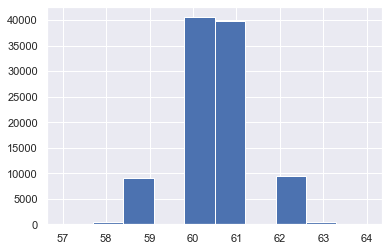

In [152]:
H = 3000
N = 100000
M = N
tod = []
duel1 = Duelist('Alice',H,0,0,0,0)
duel2 = Duelist('Bob',1000,0,50,5,0)
arena = Arena(duel1,duel2)
while N>0:
    duel1 = Duelist('Alice',H,0,0,0,0)
    duel2 = Duelist('Bob',1000,0,50,5,0)
    arena.dummy(uniform=False)
    tod.append(arena.timeofdeath())
    N -=1

#uniquetod = sorted(set(tod))
#freq = {}
#for t in uniquetod:
#    freq[t] = tod.count(t)
plt.hist(tod)
plt.show()